In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 88.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.0 MB/s eta 0:00:00
  Created wheel for Cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102754 sha256=ba0edcdcff6af640581313e6c5c0c27d04d4481f986118a61957fa64086d0c10
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built Cartopy


In [ ]:
import pandas as pd

#visualization tools
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

In [ ]:
import os
steam_data = pd.read_csv('steam.csv')
# Define a function to convert owners to exponential notation
def convert_to_exponential(value):
    numbers = value.split("-")
    result = ''
    result =  "{:.0e}".format(float(numbers[0].replace(',', ''))) + '-'+  "{:.0e}".format(float(numbers[1].replace(',', '')))
  
    return result
# get mean value of number of owners
def convert_mean(value):
    numbers = value.split("-")
    result = (int(numbers[0]) + int(numbers[1]))/2
    return int(result)

# Apply the function to the owners column
steam_data['owners_exp'] = steam_data['owners'].apply(convert_to_exponential)
steam_data['owners_mean'] = steam_data['owners'].apply(convert_mean)
steam_data['genres'] = steam_data['genres'].str.lower().apply(lambda x: x.split(';')[0]) # convert lower and split get first
steam_data['categories'] = steam_data['categories'].str.lower() # convert lower
steam_data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,owners_exp,owners_mean
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,multi-player;online multi-player;local multi-p...,action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,1e+07-2e+07,15000000
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,multi-player;online multi-player;local multi-p...,action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,5e+06-1e+07,7500000
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,multi-player;valve anti-cheat enabled,action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,5e+06-1e+07,7500000
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,multi-player;online multi-player;local multi-p...,action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,5e+06-1e+07,7500000
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,single-player;multi-player;valve anti-cheat en...,action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,5e+06-1e+07,7500000


In [ ]:
steam_data.describe()


,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_mean
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000,2.707500e+04
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193,1.340905e+05
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922,1.328089e+06
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,1.000000e+04
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000,1.000000e+04
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000,1.000000e+04
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000,3.500000e+04
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000,1.500000e+08


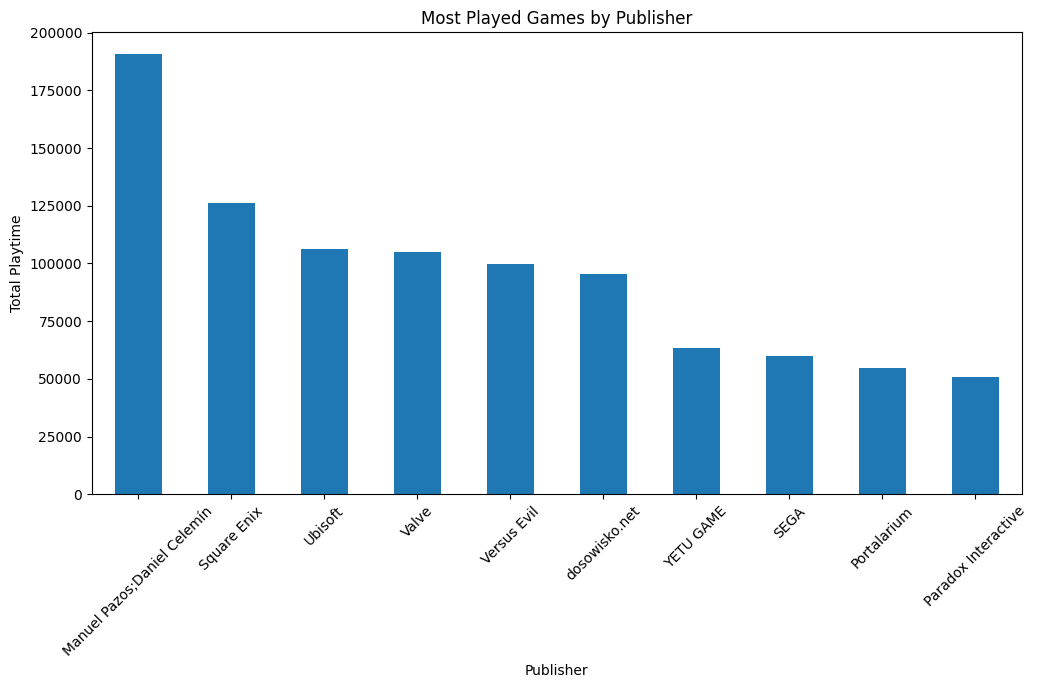

In [ ]:
# Group the games by publisher and calculate the sum of playtime
total_playtime_by_publisher = steam_data.groupby('publisher')['average_playtime'].sum()

# Sort the publishers based on total playtime in descending order
sorted_publishers = total_playtime_by_publisher.sort_values(ascending=False)

# Select the top N publishers to display in the plot (e.g., top 10)
top_publishers = sorted_publishers.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Total Playtime')
plt.title('Most Played Games by Publisher')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Group the data by genre and calculate the sum of average playtime
most_played_by_genre = steam_data.groupby('genres')['average_playtime'].mean()

# Filter the genres with average playtime above 100 hours
most_played_by_genre = most_played_by_genre[most_played_by_genre > 50]

# Sort the genres based on total playtime in descending order
most_played_by_genre = most_played_by_genre.sort_values(ascending=False)

# Display the most played games by genre
print(most_played_by_genre)

genres
massively multiplayer    3022.250000
free to play              663.202532
racing                    347.071066
rpg                       316.535627
photo editing             293.000000
simulation                261.649762
strategy                  204.229323
utilities                 166.633333
adventure                 155.515601
action                    149.868534
sports                    147.891566
indie                     137.754098
design & illustration     127.178571
animation & modeling      105.500000
nudity                     87.678571
sexual content             84.395918
casual                     72.927052
Name: average_playtime, dtype: float64


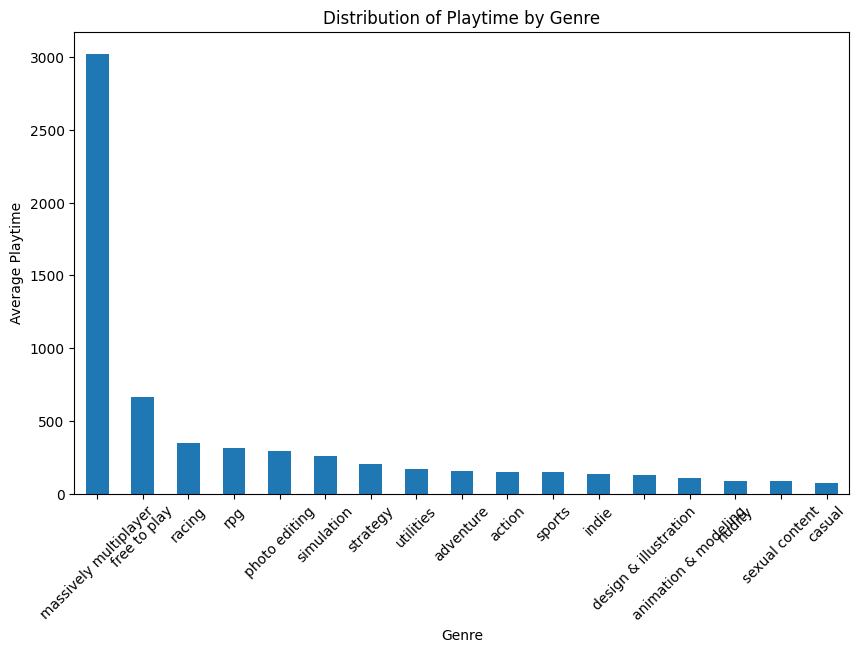

In [ ]:
# Plot a bar chart
plt.figure(figsize=(10, 6))
most_played_by_genre.plot(kind='bar')

plt.xlabel('Genre')
plt.ylabel('Average Playtime')
plt.title('Distribution of Playtime by Genre')
plt.xticks(rotation=45)
plt.show()

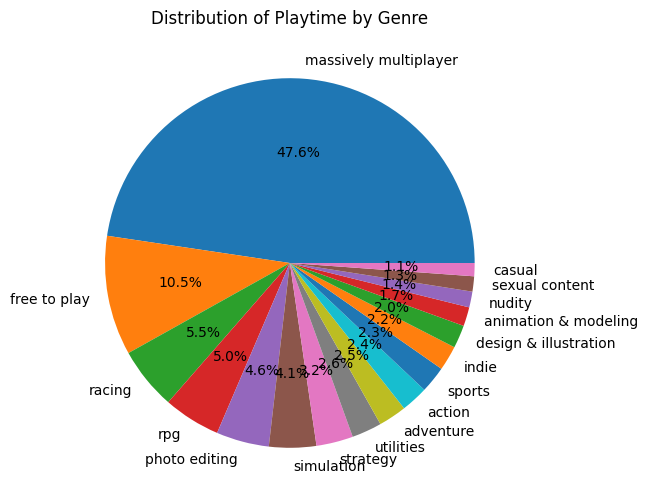

In [ ]:
plt.figure(figsize=(10, 6))
most_played_by_genre.plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribution of Playtime by Genre')
plt.ylabel('')
plt.show()

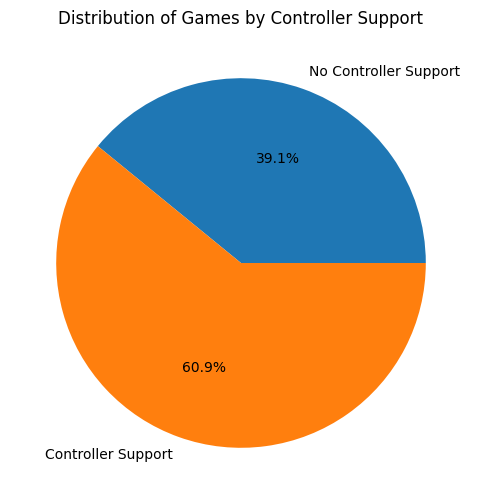

In [ ]:
import numpy as np
# Create a new column to categorize games support
steam_data['controller_support'] = np.where(steam_data['categories'].str.contains('controller support'), True, False)

# Group by game type and calculate the mean playtime
average_playtime_by_controller_support= steam_data.groupby('controller_support')['owners_mean'].mean()
# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(average_playtime_by_controller_support, labels=['No Controller Support', 'Controller Support'], autopct='%1.1f%%')
plt.title('Distribution of Games by Controller Support')

plt.show()

In [ ]:
# 0-20 , 20-50, 50 above parası az olanlara daha çok kişi almıştır.

# Define price ranges
price_ranges = ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']

# Categorize games based on price range
steam_data['price_range'] = pd.cut(steam_data['price'], bins=[0, 10, 20, 30, 40, 50, float('inf')], labels=price_ranges)

# Group by price range and calculate the sum of owners
owners_by_price_range = steam_data.groupby('price_range')['owners_mean'].sum()

# Display the result
print(owners_by_price_range)

price_range
0-10     1358985000
11-20     736825000
21-30     279635000
31-40      69130000
41-50      51540000
50+         1995000
Name: owners_mean, dtype: int64


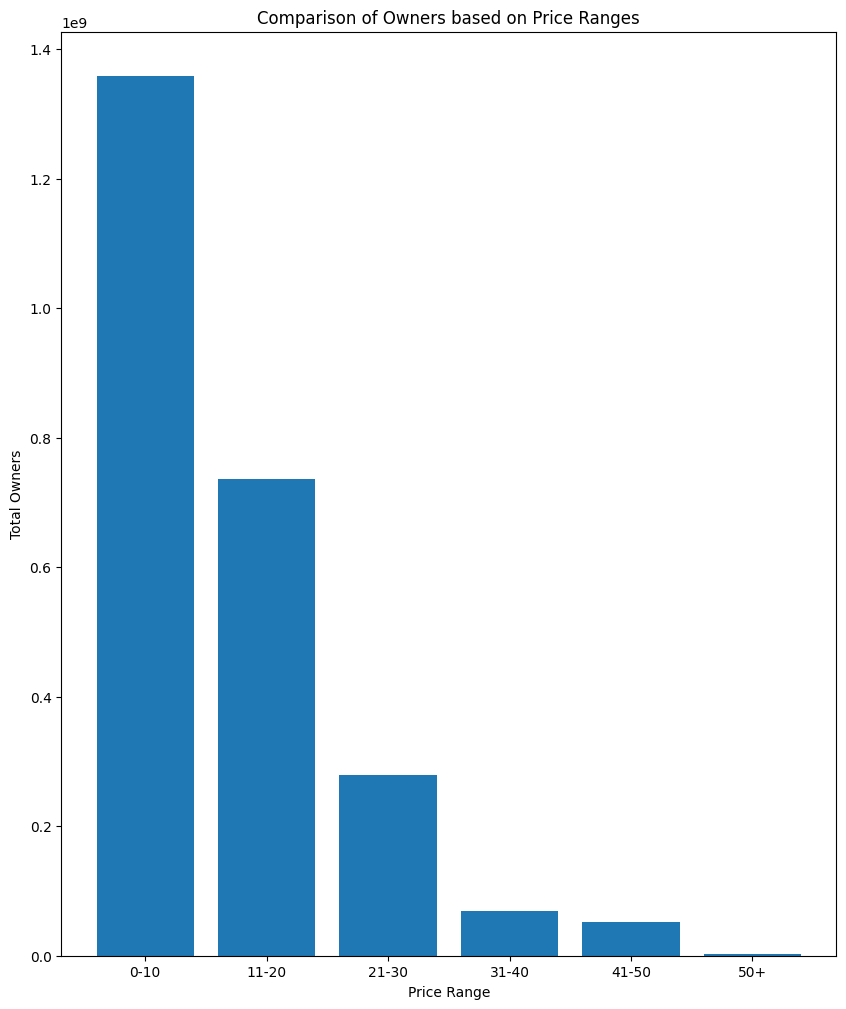

In [ ]:

plt.figure(figsize=(10, 12))

# Plot the bar chart
plt.bar(owners_by_price_range.index, owners_by_price_range.values)
plt.xlabel('Price Range')
plt.ylabel('Total Owners')
plt.title('Comparison of Owners based on Price Ranges')
plt.show()

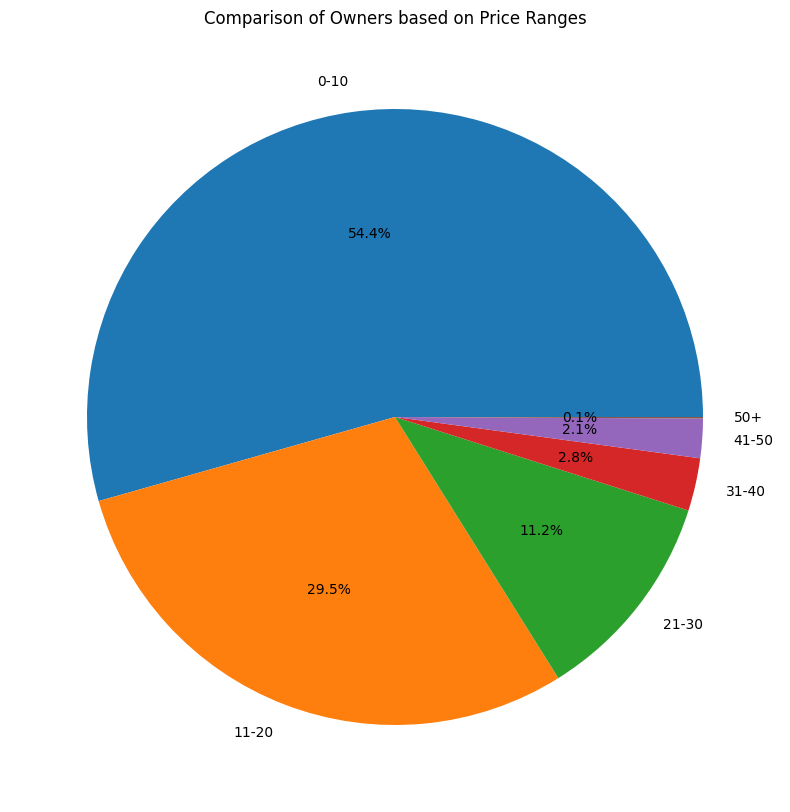

In [ ]:
plt.figure(figsize=(10, 10))

# Plot the pie chart
plt.pie(owners_by_price_range.values, labels=owners_by_price_range.index, autopct='%1.1f%%')
plt.title('Comparison of Owners based on Price Ranges')
plt.show()


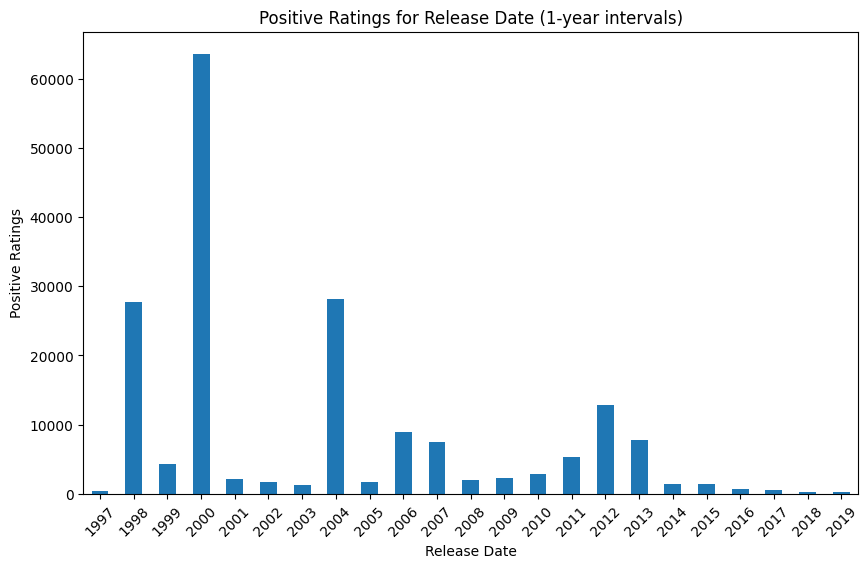

In [ ]:
'''
The release date (year) of a game on Steam has an impact on its popularity, 
as measured by the number of positive user reviews, with more recent games receiving higher ratings compared to older games.
'''
steam_data['release_date'] = pd.to_datetime(steam_data['release_date'])

# Group by release date and calculate the mean positive ratings
average_positive_ratings_by_release_date = steam_data.groupby(pd.Grouper(key='release_date', freq='1Y'))['positive_ratings'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_positive_ratings_by_release_date.plot(kind='bar')
plt.xlabel('Release Date')
plt.ylabel('Positive Ratings')
plt.title('Positive Ratings for Release Date (1-year intervals)')
plt.xticks(rotation=45)

# Modify x-axis tick labels
tick_labels = [str(label.year) for label in average_positive_ratings_by_release_date.index]
plt.xticks(range(len(tick_labels)), tick_labels)

plt.show()

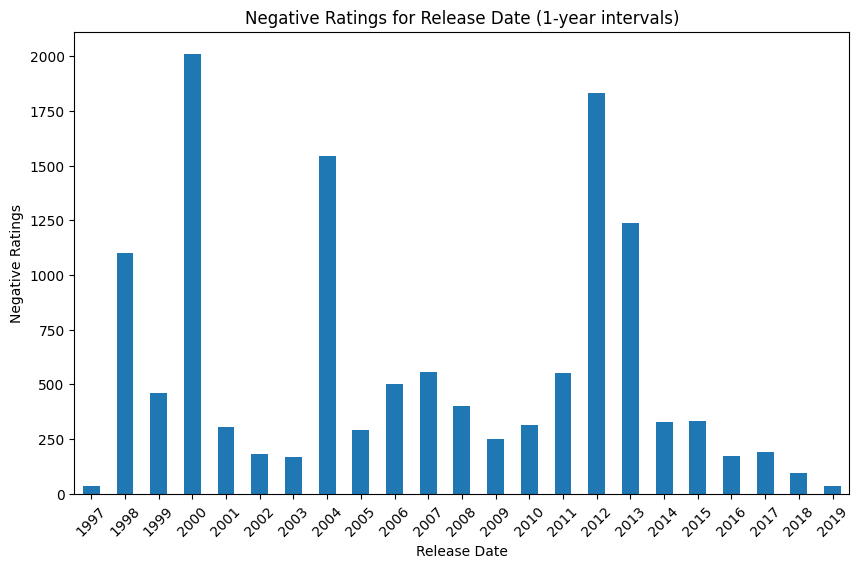

In [ ]:
'''
The release date (year) of a game on Steam has an impact on its popularity, 
as measured by the number of positive user reviews, with more recent games receiving higher ratings compared to older games.
'''
steam_data['release_date'] = pd.to_datetime(steam_data['release_date'])

# Group by release date and calculate the mean positive ratings
average_positive_ratings_by_release_date = steam_data.groupby(pd.Grouper(key='release_date', freq='1Y'))['negative_ratings'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_positive_ratings_by_release_date.plot(kind='bar')
plt.xlabel('Release Date')
plt.ylabel('Negative Ratings')
plt.title('Negative Ratings for Release Date (1-year intervals)')
plt.xticks(rotation=45)

# Modify x-axis tick labels
tick_labels = [str(label.year) for label in average_positive_ratings_by_release_date.index]
plt.xticks(range(len(tick_labels)), tick_labels)

plt.show()

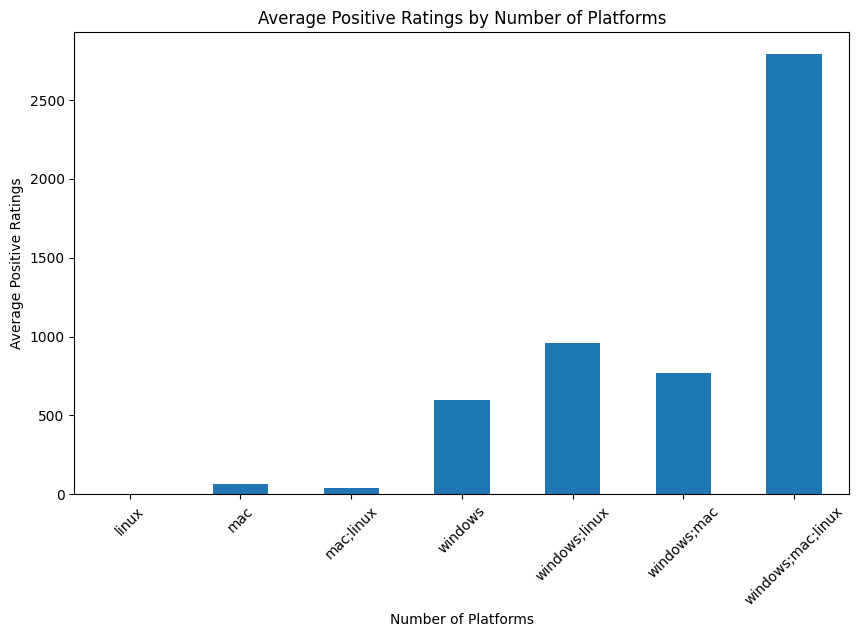

In [ ]:
'''
The platform on which a game is available on Steam affects its popularity,
 as measured by the number of positive user reviews. Games available on multiple platforms
 tend to receive more positive ratings compared to games exclusive to a single platform
'''
# Group by number of platforms and calculate the mean positive ratings
average_positive_ratings_by_platforms = steam_data.groupby('platforms')['positive_ratings'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_positive_ratings_by_platforms.plot(kind='bar')
plt.xlabel('Number of Platforms')
plt.ylabel('Average Positive Ratings')
plt.title('Average Positive Ratings by Number of Platforms')
plt.xticks(rotation=45)

plt.show()


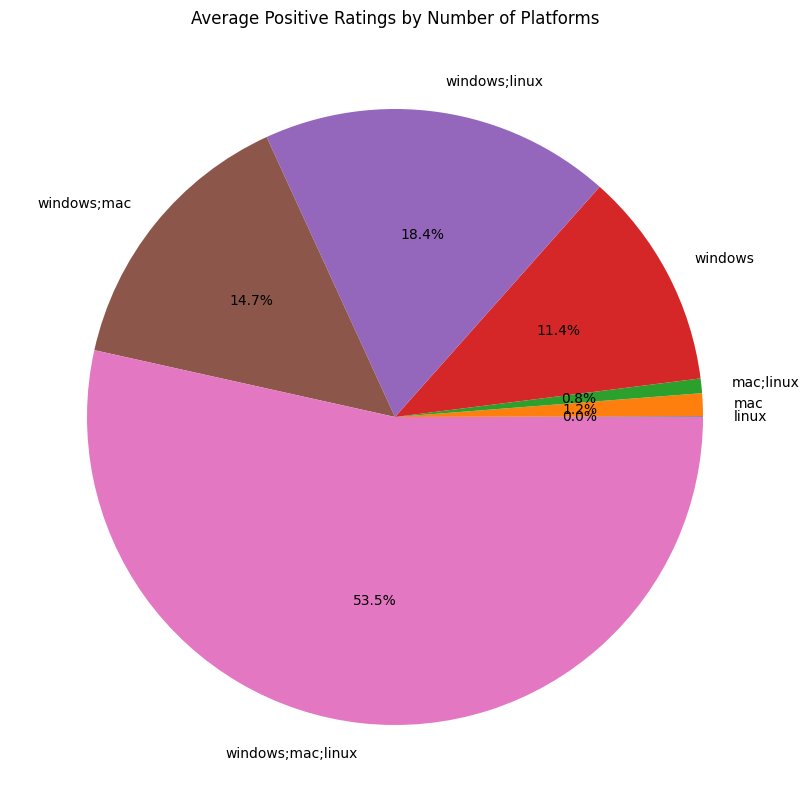

In [ ]:
plt.figure(figsize=(10, 10))

# Plot the pie chart
plt.pie(average_positive_ratings_by_platforms, labels=average_positive_ratings_by_platforms.index, autopct='%1.1f%%')
plt.title('Average Positive Ratings by Number of Platforms')
plt.show()


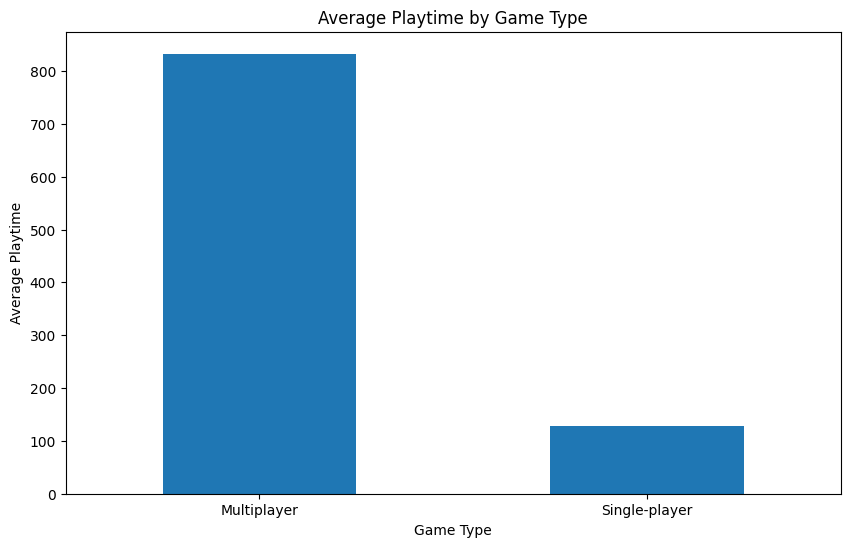

In [ ]:
'''
"The presence of multiplayer functionality in a game on Steam is associated with
 higher average playtime compared to single-player games."

'''
import numpy as np

# Create a new column to categorize games as multiplayer or single-player
steam_data['game_type'] = np.where(steam_data['steamspy_tags'].str.contains('Multiplayer'), 'Multiplayer', 'Single-player')

# Group by game type and calculate the mean playtime
average_playtime_by_game_type = steam_data.groupby('game_type')['average_playtime'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_playtime_by_game_type.plot(kind='bar')
plt.xlabel('Game Type')
plt.ylabel('Average Playtime')
plt.title('Average Playtime by Game Type')
plt.xticks(rotation=0)

plt.show()


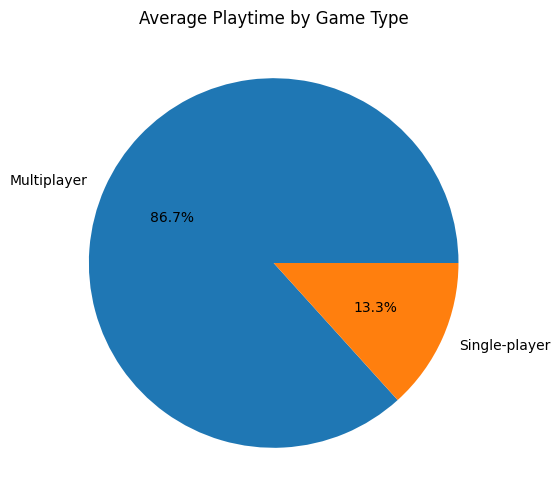

In [ ]:
plt.figure(figsize=(6, 6))

# Plot the pie chart
plt.pie(average_playtime_by_game_type, labels=average_playtime_by_game_type.index, autopct='%1.1f%%')
plt.title('Average Playtime by Game Type')

plt.show()
